In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Replace with your real file path
file_path = r"C:\Users\hp\Pictures\AlphaCare Insurance Solutions (ACIS)\alpha-care-risk-analytics\data\raw\insurance_data_feb2014_aug2015.txt"

# Load pipe-delimited data
df = pd.read_csv(file_path, delimiter='|')

# Quick check of structure
print(df.shape)     # rows, columns
print(df.head())    # first few rows


C:\Users\hp\AppData\Local\Temp\ipykernel_31120\1426495465.py:6: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='|')


(1000098, 52)
   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...          

In [4]:
# Data types and missing values
df.info()

# Summary stats for numeric fields
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [6]:
# drop rows where all elements are missing 
df = df.dropna(how='all')
#Remove duplicate rows
df = df.drop_duplicates()



In [9]:
#standerize colum names 
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)
#Fix data types

#Convert key columns (adjust names to match your actual file)


# Convert numeric columns
num_cols = ['totalclaims', 'totalpremium', 'customvalueestimate']

for col in num_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(',', '')   # remove thousand separators
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')



In [11]:
#Clean text categories
"Standardize text fields"

cat_cols = ['province', 'vehicletype', 'gender', 'make', 'model']

for col in cat_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.strip()
        .str.title()
    )

In [41]:
# Convert date field
df['transactionmonth'] = pd.to_datetime(df['transactionmonth'], errors='coerce')

# Convert financial fields
df['totalclaims'] = pd.to_numeric(df['totalclaims'], errors='coerce')
df['totalpremium'] = pd.to_numeric(df['totalpremium'], errors='coerce')
df['customValueestimate'] = pd.to_numeric(df['customvalueestimate'], errors='coerce')


In [42]:
print(df.columns.tolist())

['underwrittencoverid', 'policyid', 'transactionmonth', 'isvatregistered', 'citizenship', 'legaltype', 'title', 'language', 'bank', 'accounttype', 'maritalstatus', 'gender', 'country', 'province', 'postalcode', 'maincrestazone', 'subcrestazone', 'itemtype', 'mmcode', 'vehicletype', 'registrationyear', 'make', 'model', 'cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'numberofdoors', 'vehicleintrodate', 'customvalueestimate', 'alarmimmobiliser', 'trackingdevice', 'capitaloutstanding', 'newvehicle', 'writtenoff', 'rebuilt', 'converted', 'crossborder', 'numberofvehiclesinfleet', 'suminsured', 'termfrequency', 'calculatedpremiumperterm', 'excessselected', 'covercategory', 'covertype', 'covergroup', 'section', 'product', 'statutoryclass', 'statutoryrisktype', 'totalpremium', 'totalclaims', 'lossratio', 'customValueestimate']


In [12]:
#Handle missing values
"Check missing data"
df.isna().sum()

underwrittencoverid               0
policyid                          0
transactionmonth                  0
isvatregistered                   0
citizenship                       0
legaltype                         0
title                             0
language                          0
bank                         145961
accounttype                   40232
maritalstatus                  8259
gender                            0
country                           0
province                          0
postalcode                        0
maincrestazone                    0
subcrestazone                     0
itemtype                          0
mmcode                          552
vehicletype                       0
registrationyear                  0
make                              0
model                             0
cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
numberofdoors               

In [13]:
#handling missing values 
# Fill missing numeric fields with 0
df[num_cols] = df[num_cols].fillna(0)

# Fill missing categorical fields with "Unknown"
df[cat_cols] = df[cat_cols].fillna("Unknown")


In [19]:
#Feature engineering (data preparation)

#Create useful derived variables.
import numpy as np
#Loss Ratio per record
df['lossratio'] = np.where(
    df['totalpremium'] > 0,
    df['totalclaims'] / df['totalpremium'],
    np.nan
)
print(df[['totalclaims', 'totalpremium', 'lossratio']].head())

   totalclaims  totalpremium  lossratio
0          0.0     21.929825        0.0
1          0.0     21.929825        0.0
2          0.0      0.000000        NaN
3          0.0    512.848070        0.0
4          0.0      0.000000        NaN


In [29]:
#Summarization (creating analysis-ready tables)
#Overall portfolio summary
portfolio_summary = pd.DataFrame({
    'total_premium': [df['totalpremium'].sum()],
    'total_claims': [df['totalclaims'].sum()]
})

portfolio_summary['loss_ratio'] = (
    portfolio_summary['total_claims'] /
    portfolio_summary['total_premium']
)

portfolio_summary

,total_premium,total_claims,loss_ratio
0,6.191156e+07,6.486755e+07,1.047745


In [30]:
# Save clean dataset
df.to_csv(r"C:\Users\hp\Pictures\AlphaCare Insurance Solutions (ACIS)\alpha-care-risk-analytics\data\processed\insurance_cleaned_dataset.csv", index=False)

In [24]:
#Create the Loss Ratio (core insurance metric)
#Portfolio-level loss ratio
# claclulate totalclaims/totalpremium 
"divide totals, not row-level ratios"
total_claims = df['totalclaims'].sum()
total_premium = df['totalpremium'].sum()

loss_ratio = total_claims / total_premium

print("Overall Loss Ratio:", loss_ratio)



Overall Loss Ratio: 1.0477452570332206


In [28]:
# calculate Loss ratio by Province
province_lr = df.groupby('province').agg({
    'totalclaims': 'sum',
    'totalpremium': 'sum'
}).reset_index()

province_lr['lossRatio'] = province_lr['totalclaims'] / province_lr['totalpremium']

print(province_lr.sort_values('lossRatio', ascending=False))


        province   totalclaims  totalpremium  lossRatio
2        Gauteng  2.939415e+07  2.405377e+07   1.222018
3  Kwazulu-Natal  1.430138e+07  1.320908e+07   1.082693
8   Western Cape  1.038977e+07  9.806559e+06   1.059472
6     North West  5.920250e+06  7.490508e+06   0.790367
5     Mpumalanga  2.044675e+06  2.836292e+06   0.720897
1     Free State  3.549223e+05  5.213632e+05   0.680758
4        Limpopo  1.016477e+06  1.537324e+06   0.661199
0   Eastern Cape  1.356427e+06  2.140104e+06   0.633813
7  Northern Cape  8.949051e+04  3.165581e+05   0.282699


In [ ]:
# calculate vehicle type loss ratios 
vehicle_lr = df.groupby('vehicletype').agg({
    'totalclaims': 'sum',
    'totalpremium': 'sum'
}).reset_index()

vehicle_lr['lossRatio'] = vehicle_lr['totalclaims'] / vehicle_lr['totalpremium']
print(vehicle_lr.sort_values('lossRatio', ascending=False))



         VehicleType   TotalClaims  TotalPremium  LossRatio
1   Heavy Commercial  7.504746e+05  4.609479e+05   1.628112
3  Medium Commercial  4.119867e+06  3.922746e+06   1.050251
4  Passenger Vehicle  5.937207e+07  5.664202e+07   1.048198
2   Light Commercial  6.045250e+04  2.604975e+05   0.232066
0                Bus  7.996535e+03  5.824474e+04   0.137292


In [93]:
# calculate loss ration by geneder 
gender_lr = df.groupby('Gender').agg({
    'TotalClaims': 'sum',
    'TotalPremium': 'sum'
}).reset_index()

gender_lr['LossRatio'] = gender_lr['TotalClaims'] / gender_lr['TotalPremium']
print(gender_lr.sort_values('LossRatio', ascending=False))


          Gender   TotalClaims  TotalPremium  LossRatio
2  Not specified  6.271410e+07  5.920275e+07   1.059311
1           Male  1.396704e+06  1.580143e+06   0.883910
0         Female  2.502461e+05  3.044806e+05   0.821879


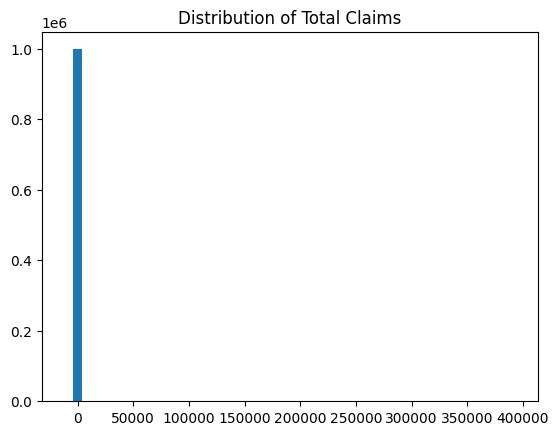

In [95]:
#Distribution analysis
#Histograms for skewness
import matplotlib.pyplot as plt 
plt.figure()
plt.hist(df['TotalClaims'].dropna(), bins=50)
plt.title("Distribution of Total Claims")
plt.savefig(r'c:\Users\hp\Pictures\AlphaCare Insurance Solutions (ACIS)\alpha-care-risk-analytics\output\Distribution_total_claims.png')
plt.show()

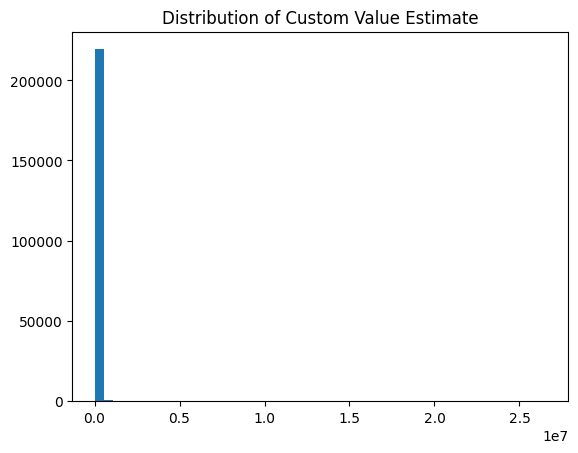

In [98]:
#histogram for custom value estimate 
plt.figure()
plt.hist(df['CustomValueEstimate'].dropna(), bins=50)
plt.title("Distribution of Custom Value Estimate")
plt.savefig(r"C:\Users\hp\Pictures\AlphaCare Insurance Solutions (ACIS)\alpha-care-risk-analytics\output\Distribution_customvalue_estimate.png")
plt.show()

In [99]:
#IQR-based outlier detection
Q1 = df['TotalClaims'].quantile(0.25)
Q3 = df['TotalClaims'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

outliers = df[df['TotalClaims'] > upper_bound]

print("Number of extreme claim outliers:", outliers.shape[0])


Number of extreme claim outliers: 2788


In [101]:
#Temporal trend analysis (18-month behavior)
#Create a Year–Month column
df['YearMonth'] = df['TransactionMonth'].dt.to_period('M')


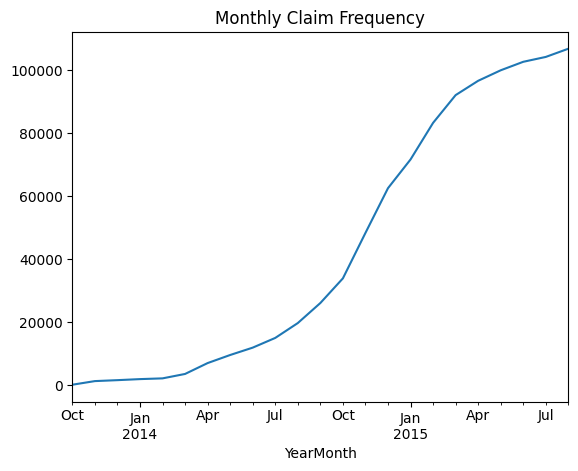

In [103]:
#Claim frequency (count of claims per month)
monthly_claim_count = df.groupby('YearMonth').size()

plt.figure()
monthly_claim_count.plot()
plt.title("Monthly Claim Frequency")
plt.savefig(r"c:\Users\hp\Pictures\AlphaCare Insurance Solutions (ACIS)\alpha-care-risk-analytics\output\monthly_claim_frequency.png")
plt.show()


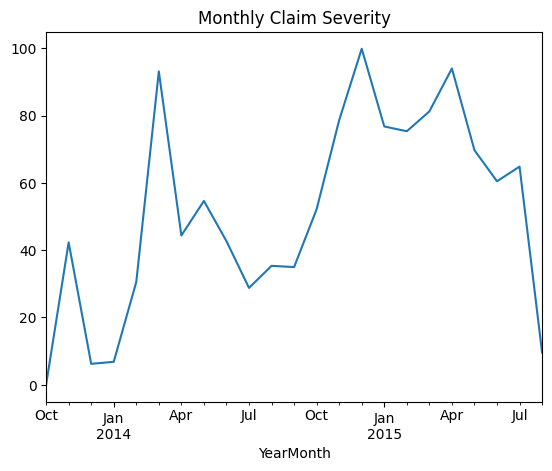

In [104]:
#Claim severity (average claim size per month)
monthly_claim_severity = df.groupby('YearMonth')['TotalClaims'].mean()

plt.figure()
monthly_claim_severity.plot()
plt.title("Monthly Claim Severity")
plt.savefig(r"c:\Users\hp\Pictures\AlphaCare Insurance Solutions (ACIS)\alpha-care-risk-analytics\output\monthly_claim_severity.png")
plt.show()


In [110]:
#Vehicle make/model risk analysis
#Average claim by Maker 
make_claims = df.groupby('make')['TotalClaims'].mean().sort_values(ascending=False)
print(make_claims)


make
SUZUKI                                 419.634546
JMC                                    191.684795
HYUNDAI                                174.215195
MARCOPOLO                              156.794806
AUDI                                   137.843083
POLARSUN                               134.044800
B.A.W                                  132.934016
FIAT                                   108.625642
BMW                                     90.558050
IVECO                                   89.667017
VOLKSWAGEN                              87.877091
GOLDEN JOURNEY                          86.197105
MERCEDES-BENZ                           76.191436
MERCEDES-BENZ                           70.069035
TOYOTA                                  63.626435
CMC                                     61.210485
MAZDA                                   49.392156
C.A.M                                   43.021964
NISSAN/DATSUN                           33.970579
JINBEI                                  32.85

In [109]:
#Average claim by Model
model_claims = df.groupby('Model')['TotalClaims'].mean().sort_values(ascending=False)
print(model_claims)


Model
L/CRUISER FJ 4.0 V6 CRUISER          5340.970273
H-1 2.5 CRDI WAGON A/T               4118.181043
DUCATO 2.3 JTD VETRATO               1014.681021
POLO VIVO 1.6 5Dr                     827.558882
C180 BE COUPE                         743.459027
                                        ...     
YARIS T3+                               0.000000
YARIS ZEN3                              0.000000
T5 CARAVELLE 2.0 BiTDi                  0.000000
115 VITO 2.2 CDI CREW CAB F/C P/V       0.000000
C200K CLASSIC A/T                      -0.250832
Name: TotalClaims, Length: 411, dtype: float64


In [115]:
median_make_claims = df.groupby('make')['TotalClaims'].median().sort_values(ascending=False)
print (median_make_claims)

make
AUDI                                   0.0
B.A.W                                  0.0
BMW                                    0.0
C.A.M                                  0.0
CHERY                                  0.0
CHEVROLET                              0.0
CITROEN                                0.0
CMC                                    0.0
DAIHATSU                               0.0
FIAT                                   0.0
FORD                                   0.0
FORD                                   0.0
FOTON                                  0.0
GEELY                                  0.0
GOLDEN JOURNEY                         0.0
HINO                                   0.0
HONDA                                  0.0
HUMMER                                 0.0
HYUNDAI                                0.0
IVECO                                  0.0
JINBEI                                 0.0
JINBEI                                 0.0
JMC                                    0.0
KIA   

In [117]:
def prepare_grouped_data(data, group_col):
    grouped = data.groupby(group_col).agg(
        TotalClaims=('TotalClaims', 'sum'),
        TotalPremium=('TotalPremium', 'sum')
    ).reset_index()

    # Compute loss ratio safely
    grouped['LossRatio'] = grouped['TotalClaims'] / grouped['TotalPremium']

    return grouped


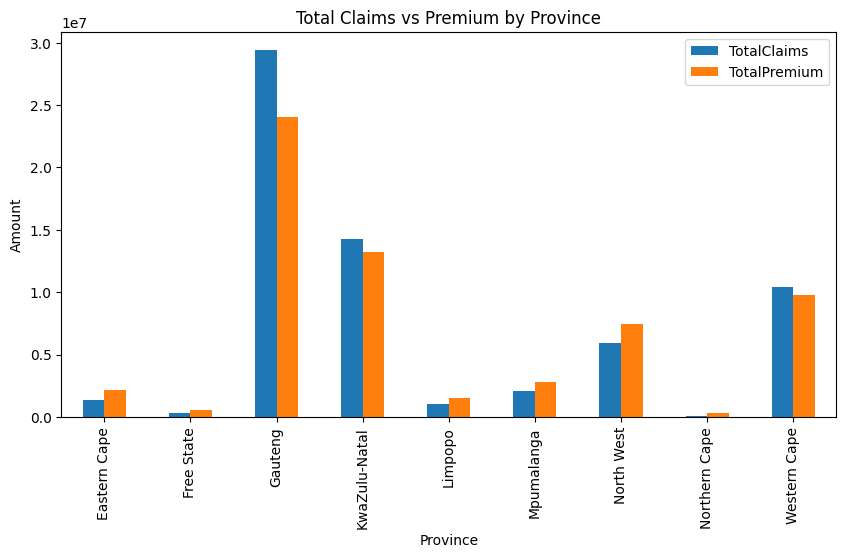

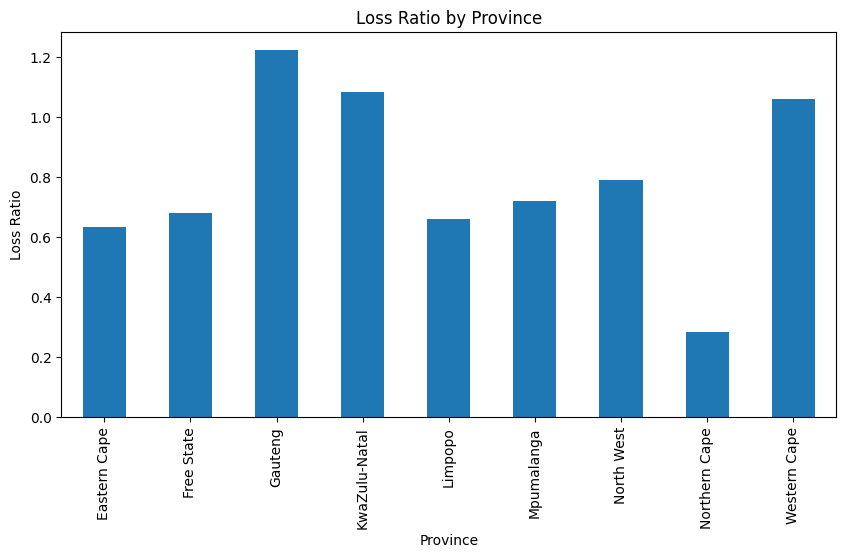

In [121]:
#Plot by Province
province_data = prepare_grouped_data(df, 'Province')

province_data.set_index('Province')[['TotalClaims', 'TotalPremium']].plot(kind='bar', figsize=(10,5))
plt.title("Total Claims vs Premium by Province")
plt.ylabel("Amount")
plt.show()

province_data.set_index('Province')['LossRatio'].plot(kind='bar', figsize=(10,5))
plt.title("Loss Ratio by Province")
plt.ylabel("Loss Ratio")
plt.savefig(r"c:\Users\hp\Pictures\AlphaCare Insurance Solutions (ACIS)\alpha-care-risk-analytics\output\loss_ratio_by_province.png")
plt.show()


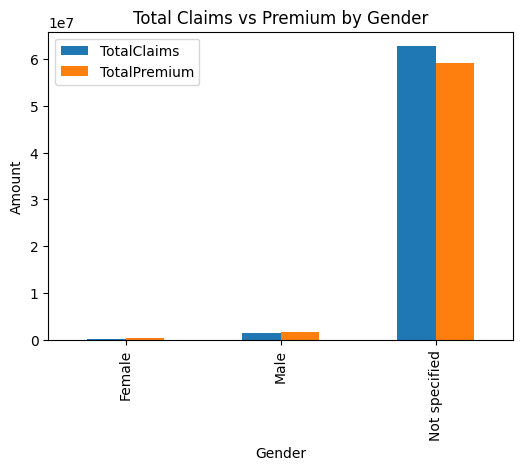

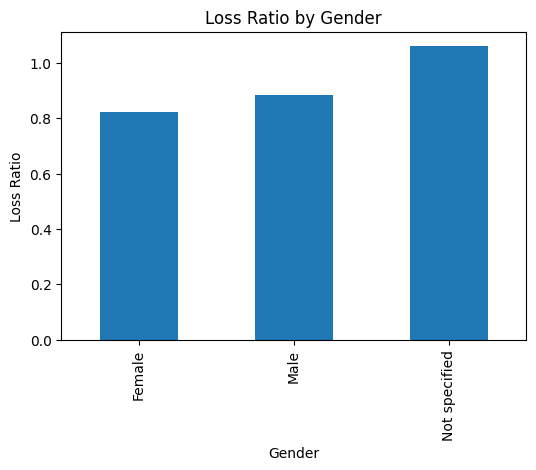

In [122]:
#plot by gender
gender_data = prepare_grouped_data(df, 'Gender')

gender_data.set_index('Gender')[['TotalClaims', 'TotalPremium']].plot(kind='bar', figsize=(6,4))
plt.title("Total Claims vs Premium by Gender")
plt.ylabel("Amount")
plt.show()

gender_data.set_index('Gender')['LossRatio'].plot(kind='bar', figsize=(6,4))
plt.title("Loss Ratio by Gender")
plt.ylabel("Loss Ratio")
plt.savefig(r"C:\Users\hp\Pictures\AlphaCare Insurance Solutions (ACIS)\alpha-care-risk-analytics\output\claims_vs_premium_gender.png")
plt.show()


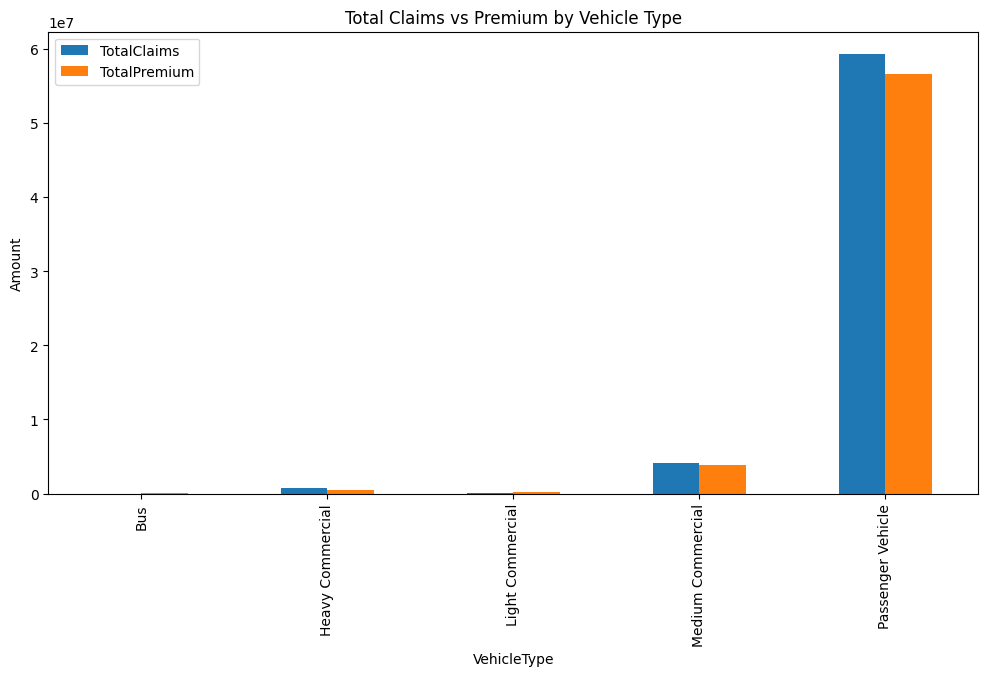

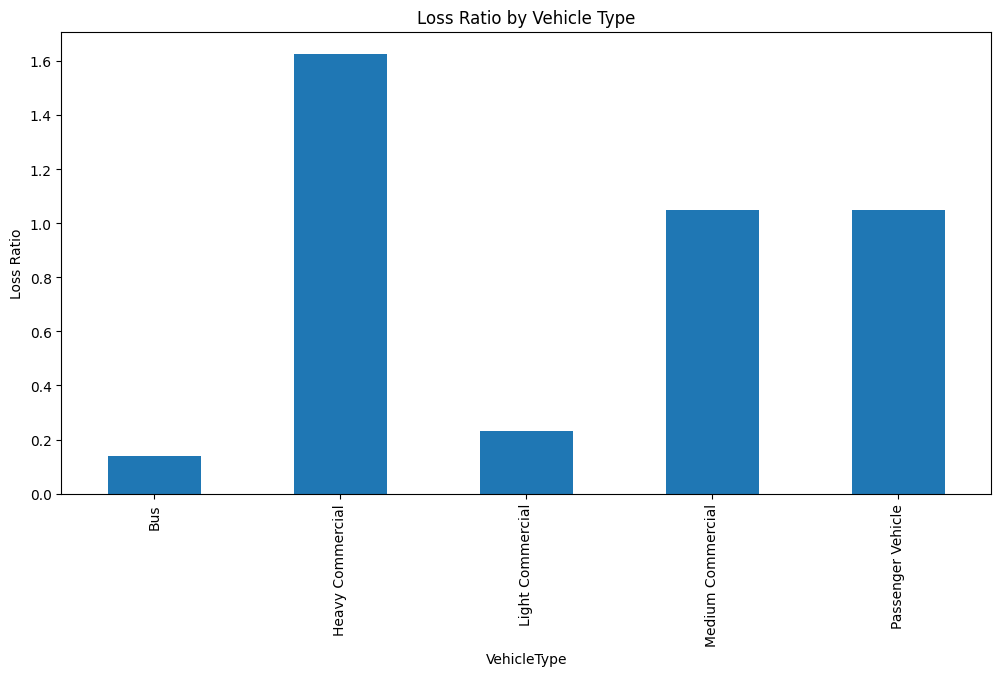

In [ ]:
#plot by vehicle type 
vehicle_data = prepare_grouped_data(df, 'VehicleType')

vehicle_data.set_index('VehicleType')[['TotalClaims', 'TotalPremium']].plot(kind='bar', figsize=(12,6))
plt.title("Total Claims vs Premium by Vehicle Type")
plt.ylabel("Amount")
plt.show()

vehicle_data.set_index('VehicleType')['LossRatio'].plot(kind='bar', figsize=(12,6))
plt.title("Loss Ratio by Vehicle Type")

plt.ylabel("Loss Ratio")
plt.show()
